# Ethereum Price

In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/bitcoin/ethereum_price.csv')

In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
756,"Aug 11, 2015",0.708087,1.130000,0.663235,1.070000,"1,463,100","42,796,500"
757,"Aug 10, 2015",0.713989,0.729854,0.636546,0.708448,"405,283","43,130,000"
758,"Aug 09, 2015",0.706136,0.879810,0.629191,0.701897,"532,170","42,637,600"
759,"Aug 08, 2015",2.790000,2.800000,0.714725,0.753325,"674,188","167,911,000"
760,"Aug 07, 2015",2.830000,3.540000,2.520000,2.770000,"164,329",-


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [6]:
df.count()

Date          761
Open          761
High          761
Low           761
Close         761
Volume        761
Market Cap    761
dtype: int64

In [7]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

There is a missing data here and there are several data which have different format. Some of the data do not use number format

In [8]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].replace('-', 'NaN')
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [9]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
756,"Aug 11, 2015",0.708087,1.130000,0.663235,1.070000,1463100.0,42796500.0
757,"Aug 10, 2015",0.713989,0.729854,0.636546,0.708448,405283.0,43130000.0
758,"Aug 09, 2015",0.706136,0.879810,0.629191,0.701897,532170.0,42637600.0
759,"Aug 08, 2015",2.790000,2.800000,0.714725,0.753325,674188.0,167911000.0
760,"Aug 07, 2015",2.830000,3.540000,2.520000,2.770000,164329.0,NaN


In [10]:
df.count()

Date          761
Open          761
High          761
Low           761
Close         761
Volume        761
Market Cap    760
dtype: int64

Convert time column into date time format

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 7 columns):
Date          761 non-null datetime64[ns]
Open          761 non-null float64
High          761 non-null float64
Low           761 non-null float64
Close         761 non-null float64
Volume        761 non-null float64
Market Cap    760 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 41.7 KB


In [13]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.000000
Open,0,0.000000
High,0,0.000000
Low,0,0.000000
Close,0,0.000000
Volume,0,0.000000
Market Cap,1,0.001314


<function matplotlib.pyplot.show(*args, **kw)>

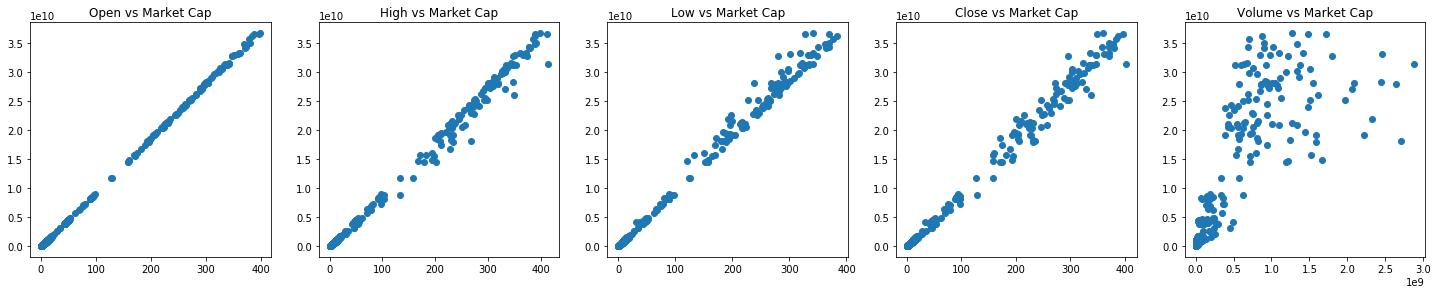

In [15]:
#Plot data to see the relation between each column
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
O = df['Open']
H = df['High']
L = df['Low']
C = df['Close']
V = df['Volume']
MC = df['Market Cap']

plt.subplot(5,5,1)
plt.scatter(O, MC)
plt.title('Open vs Market Cap')

plt.subplot(5,5,2)
plt.scatter(H, MC)
plt.title('High vs Market Cap')

plt.subplot(5,5,3)
plt.scatter(L, MC)
plt.title('Low vs Market Cap')

plt.subplot(5,5,4)
plt.scatter(C, MC)
plt.title('Close vs Market Cap')

plt.subplot(5,5,5)
plt.scatter(V, MC)
plt.title('Volume vs Market Cap')

plt.show

To fill the NaN value I try to interpolate the data using linear method using value from Open column. Because from the figure above we can see that Market Cap has linear condition with Open

In [16]:
from sklearn import linear_model

model = linear_model.LinearRegression()
Open  = df[['Open']].iloc[0:759]
Market_Cap = df['Market Cap'].iloc[0:759]

In [17]:
#Train model 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#The model score almost 1 so that indicate the model is near to the truth
model.score(Open, Market_Cap)

0.999880405021647

In [19]:
#Add a new column which is filled the missing data from model fit
open = df[['Open']]
Market_Cap_Predict = model.predict(open)
df['Market Cap Predict'] = Market_Cap_Predict
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Market Cap Predict
756,2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100.0,42796500.0,-2.280360e+07
757,2015-08-10,0.713989,0.729854,0.636546,0.708448,405283.0,43130000.0,-2.225139e+07
758,2015-08-09,0.706136,0.879810,0.629191,0.701897,532170.0,42637600.0,-2.298614e+07
759,2015-08-08,2.790000,2.800000,0.714725,0.753325,674188.0,167911000.0,1.719852e+08
760,2015-08-07,2.830000,3.540000,2.520000,2.770000,164329.0,NaN,1.757277e+08


Here I make a new column Market Cap Predict which contains Market Cap with no NaN value

In [20]:
df.count()

Date                  761
Open                  761
High                  761
Low                   761
Close                 761
Volume                761
Market Cap            760
Market Cap Predict    761
dtype: int64

The data is clean, no null value and has same format